In [1]:
import yfinance as yf
sp500 = yf.Ticker('^GSPC')
sp500 = sp500.history(period = "max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-16 00:00:00-04:00,5644.089844,5669.669922,5639.020020,5667.200195,4041760000,0.0,0.0
2024-07-17 00:00:00-04:00,5610.069824,5622.490234,5584.810059,5588.270020,4246450000,0.0,0.0
2024-07-18 00:00:00-04:00,5608.560059,5614.049805,5522.810059,5544.589844,4007510000,0.0,0.0


<Axes: xlabel='Date'>

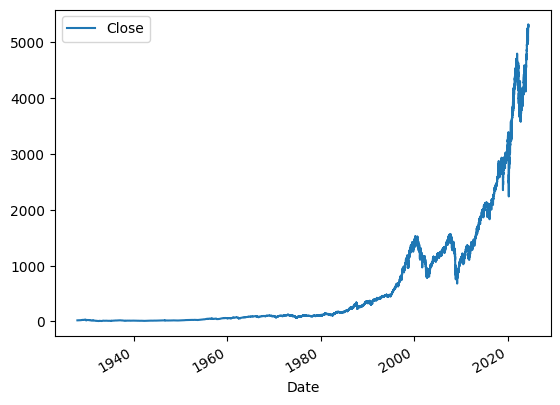

In [3]:
# index is date in left-most column
sp500.plot.line(y="Close", use_index = True)

In [ ]:
# remove data you don't need
del sp500["Dividends"]
del sp500["Stock Splits"]

# create a new Tomorrow column that has the closing price of the next day using pandas shift method
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [7]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-05-20 00:00:00-04:00,5305.350098,5325.319824,5302.399902,5308.129883,3420100000,5321.410156
2024-05-21 00:00:00-04:00,5298.689941,5324.319824,5297.870117,5321.410156,3662240000,5307.009766
2024-05-22 00:00:00-04:00,5319.279785,5323.180176,5286.009766,5307.009766,3847130000,5267.839844


In [8]:
# target is a boolean indicating if tom's price is greater than today's
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # astype (pandas method) converts boolean to int


In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-05-20 00:00:00-04:00,5305.350098,5325.319824,5302.399902,5308.129883,3420100000,5321.410156,1
2024-05-21 00:00:00-04:00,5298.689941,5324.319824,5297.870117,5321.410156,3662240000,5307.009766,0
2024-05-22 00:00:00-04:00,5319.279785,5323.180176,5286.009766,5307.009766,3847130000,5267.839844,0


In [14]:
# copy data only after 1990 using pandas loc method
sp500 = sp500.loc["1990-01-01":"2022-05-18"].copy()

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-05-12 00:00:00-04:00,3903.949951,3964.800049,3858.870117,3930.080078,6286450000,4023.889893,1
2022-05-13 00:00:00-04:00,3963.899902,4038.879883,3963.899902,4023.889893,5183340000,4008.010010,0
2022-05-16 00:00:00-04:00,4013.020020,4046.459961,3983.989990,4008.010010,4415030000,4088.850098,1


In [21]:
# research RandomForestClassifier and individual decision trees
from sklearn.ensemble import RandomForestClassifier

# n_estimators is number of individual decision trees you want to train (the higher the better up to a limit)
# min_samples_split protects against overfitting (higher = less accurate but less overfitting)
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

# split into train and test data
# all rows except last 100 rows go into train set
train = sp500.iloc[:-100]
# last 100 rows go into test set
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]

# train model using predictor columns of training data set to be able to preduct the target column
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [22]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors]) # outputs numpy array of predicted targets

import pandas as pd

preds = pd.Series(preds, index = test.index) # turn numpy array into series

In [23]:
preds

Date
2021-12-27 00:00:00-05:00    0
2021-12-28 00:00:00-05:00    0
2021-12-29 00:00:00-05:00    0
2021-12-30 00:00:00-05:00    0
2021-12-31 00:00:00-05:00    0
                            ..
2022-05-12 00:00:00-04:00    1
2022-05-13 00:00:00-04:00    1
2022-05-16 00:00:00-04:00    1
2022-05-17 00:00:00-04:00    1
2022-05-18 00:00:00-04:00    1
Length: 100, dtype: int64

In [24]:
# calculate precisioni score between actual target and predicted target
precision_score(test["Target"], preds)

0.42696629213483145

<Axes: xlabel='Date'>

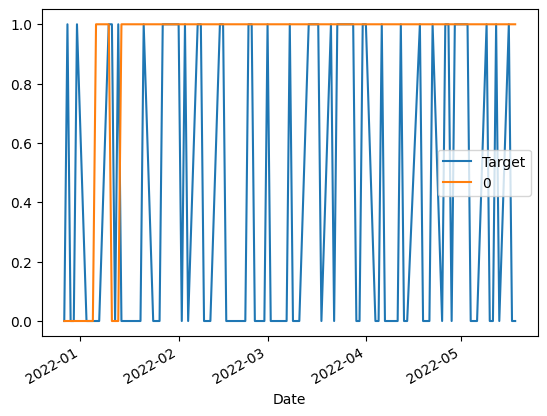

In [26]:
combined = pd.concat([test["Target"], preds], axis = 1)
combined.plot()

In [30]:
# create prediction function (wraps up everything we just did into one function)
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"]) # fit model using training data set
    preds = model.predict(test[predictors]) # generate predictions
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [33]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [36]:
predictions = backtest(sp500, model, predictors)

In [37]:
predictions["Predictions"].value_counts()

Predictions
0    3355
1    2304
Name: count, dtype: int64

In [38]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5355902777777778

In [40]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.536844
0    0.463156
Name: count, dtype: float64

In [44]:
# add more predictors to model
horizons = [2, 5, 60, 250, 1000] # compare today's closing price to closing price in the last 2, 5, 60, 250, 1000 days
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [46]:
sp500 = sp500.dropna()

In [47]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ration_2,Trend_2,Close_Ration_5,...,Trend_60,Close_Ration_250,Trend_250,Close_Ration_1000,Trend_1000,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000
Date,,,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,...,32.0,1.028047,127.0,1.176082,512.0,0.997157,0.996617,1.000283,1.028047,1.176082
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,...,32.0,1.025151,126.0,1.172676,512.0,0.998681,0.995899,0.997329,1.025151,1.172676
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,...,32.0,1.028274,127.0,1.176163,513.0,1.001621,0.999495,1.000311,1.028274,1.176163
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,...,32.0,1.034781,128.0,1.183537,514.0,1.003270,1.004991,1.006561,1.034781,1.183537
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,...,32.0,1.033359,128.0,1.181856,513.0,0.999431,1.003784,1.005120,1.033359,1.181856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-12 00:00:00-04:00,3903.949951,3964.800049,3858.870117,3930.080078,6286450000,4023.889893,1,0.999352,0.0,0.983460,...,26.0,0.885431,131.0,1.139984,552.0,0.999352,0.983460,0.905668,0.885431,1.139984
2022-05-13 00:00:00-04:00,3963.899902,4038.879883,3963.899902,4023.889893,5183340000,4008.010010,0,1.011794,1.0,1.011971,...,26.0,0.906651,132.0,1.166756,553.0,1.011794,1.011971,0.928896,0.906651,1.166756
2022-05-16 00:00:00-04:00,4013.020020,4046.459961,3983.989990,4008.010010,4415030000,4088.850098,1,0.998023,1.0,1.007128,...,26.0,0.903160,132.0,1.161718,553.0,0.998023,1.007128,0.926557,0.903160,1.161718


In [48]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)


In [52]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"]) # fit model using training data set
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [53]:
predictions = backtest(sp500, model, new_predictors)

In [54]:
predictions["Predictions"].value_counts()

Predictions
0.0    3868
1.0     791
Name: count, dtype: int64

In [56]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5739570164348925